In [1]:
import warnings
warnings.filterwarnings('ignore')
import cv2,os,math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import io
from sklearn import preprocessing , metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,precision_recall_curve,roc_auc_score, roc_curve

In [2]:
def read_data(link):
    X_Cat1,X_Dog1=os.listdir(link[0]),os.listdir(link[1])
    y_Cat1,y_Dog1=os.listdir(link[0]),os.listdir(link[1])
    X = []
    y = [] 
    for i in range(len(X_Cat1)):
        try:
            img = io.imread(os.path.join(link[0],X_Cat1[i]))
            img = resize(img,(32,32),anti_aliasing=True)
            gray = rgb2gray(img)
            X.append(list(gray.flatten()))
            y.append(y_Cat1[i])
        except:
            print("anh meo bi loi",X_Cat1[i])  
    X1 = []
    y1 = []
    
    for j in range(len(X_Dog1)):
        try:
            img1 = io.imread(os.path.join(link[1],X_Dog1[j]))
            img1 = resize(img1,(32,32),anti_aliasing=True)
            gray = rgb2gray(img1)
            X1.append(list(gray.flatten()))
            y1.append(y_Dog1[j])
        except:
            print("anh cho bi loi",X_Dog1[j])
    
    X_true = np.concatenate((X, X1), axis=0)
    y,y1=[0]*len(y),[1]*len(y1)
    y_true = np.concatenate((y, y1), axis=0)

    print(len(X_true),len(y_true))#kiem tra len X va len y
    #dua X va y vao dang numpy_arrar(ma tran)
    X=np.array(X_true)
    y=np.array(y_true)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=15)
    return X_train, X_test, y_train, y_test
# link = ['C:/Users/ADMIN/Downloads/kagglecatsanddogs_5340/PetImages/Cat',
#             "C:/Users/ADMIN/Downloads/kagglecatsanddogs_5340/PetImages/Dog"]

In [3]:
def confunction_matrix_logistics(y_test,y_hat):
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    print(confusion_matrix)
    TP=confusion_matrix[0,0]
    FN=confusion_matrix[0,1]
    FP=confusion_matrix[1,0]
    TN=confusion_matrix[1,1]
    precision_logistics=TP/(TP+FP)
    recall_logistics=TP/(TP+FN)
    f1_logistics=2*(precision_logistics*recall_logistics)/(precision_logistics+recall_logistics)
    print("sử dụng mô hình confunction matrix độ đo presion",precision_logistics)
    print("sử dụng mô hình confunction matrix độ đo recall",recall_logistics)
    print("sử dụng mô hình confunction matrix độ đo f1",f1_logistics)
    

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [4]:
def confunction_matrix_KNN(y_test,y_hat_KNN):
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat_KNN)
    TP1=confusion_matrix[0,0]
    FN1=confusion_matrix[0,1]
    FP1=confusion_matrix[1,0]
    TN1=confusion_matrix[1,1]
    precision_KNN=TP1/(TP1+FP1)
    recall_KNN=TP1/(TP1+FN1)
    f1_KNN=2*(precision_KNN*recall_KNN)/(precision_KNN+recall_KNN)
    print("sử dụng mô hình confunction matrix độ đo presion KNN ",precision_KNN)
    print("sử dụng mô hình confunction matrix độ đo recall KNN",recall_KNN)
    print("sử dụng mô hình confunction matrix độ đo f1 KNN",f1_KNN)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [5]:
def Y_du_doan_KNN(X_train, y_train,X_test):
    m = y_train.shape[0]
    k_max = int(np.sqrt(m)/2)
    print('k max: ', k_max)
    #B4: Tạo lưới tham số với GridSearchCV
    k_values = np.arange(start=1, stop = k_max + 1,
    dtype=int)
    print('Các giá trị k: ', k_values)
    params = {'n_neighbors': k_values}
    #B5: Khởi tạo và huấn luyện mô hình
    kNN = KNeighborsClassifier()
    kNN.fit(X_train, y_train)
    y_hat_KNN = kNN.predict(X_test)
    return y_hat_KNN

In [6]:
def scores_KNN(y_test,y_hat_KNN):
    ac_KNN=accuracy_score(y_hat_KNN, y_test)
    print("Hiệu năng mô hình acc cua K lân cận",ac_KNN)
    ps_KNN=precision_score(y_test, y_hat_KNN,average='macro')
    print("Hiệu năng mô hình precision cua K lân cận",ps_KNN)
    rs_KNN =recall_score(y_test, y_hat_KNN, average='macro')
    print("Hiệu năng mô hình recall cua K lân cận",rs_KNN)
    f1_KNN= 2*(ps_KNN*rs_KNN)/(ps_KNN+rs_KNN)
    print("Hiệu năng mô hình f1 cua K lân cận",f1_KNN)
    return ac_KNN,ps_KNN,rs_KNN,f1_KNN

In [7]:
def y_du_doan_logistic(X_test,y_test):
    model = LogisticRegressionCV(cv=3, random_state=15).fit(X_test, y_test)
    y_hat = model.predict(X_test)
    return  y_hat

In [8]:
def scores(y_test,y_hat):
    ac=accuracy_score(y_hat, y_test)
    print('Hiệu năng mô hình acc cua logistic : ', ac)
    ps=precision_score(y_test, y_hat,average='macro')
    print("Hiệu năng mô hình precision cua logistic",ps)
    rs =recall_score(y_test, y_hat, average='macro')
    print("Hiệu năng mô hình recall cua logistic",rs)
    f1= 2*(ps*rs)/(ps+rs)
    print("Hiệu năng mô hình f1 cua logistic",f1)
    return ac,ps,rs,f1

In [9]:
def roc(X_train, y_train,X_test,y_test):
    #B3: Khởi tạo và huấn luyện mô hình
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)
    gnb_model = KNeighborsClassifier()
    gnb_model.fit(X_train, y_train)
    #B4: Lấy xác suất dự đoán nhãn positive của mô hình
    lg_probs = lg_model.predict_proba(X_test)[:,1]
    gnb_probs = gnb_model.predict_proba(X_test)[:,1]
    #B5: Tính ROC score
    lg_auc = roc_auc_score(y_test, lg_probs)
    gnb_auc = roc_auc_score(y_test, gnb_probs)
    print('Mô hình Logistic Regression - ROC AUC: ', lg_auc)
    print('Mô hình Naive Bayes - ROC AUC: ', gnb_auc)
    #B6: Vẽ đường ROC
    lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
    gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
    plt.plot(lg_fpr, lg_tpr, marker ='.', label='Logistic')
    plt.plot(gnb_fpr, gnb_tpr, marker='3', label='K_NN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [10]:
def ps_and_rs(X_train, y_train,X_test,y_test):
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)
    gnb_model = KNeighborsClassifier()
    gnb_model.fit(X_train, y_train)
    #B4: Lấy xác suất dự đoán của mô hình
    lg_probs = lg_model.predict_proba(X_test)
    gnb_probs = gnb_model.predict_proba(X_test)
    #Chỉ lấy xác suất dự đoán với nhãn positive
    lg_probs = lg_probs[:,1]
    gnb_probs = gnb_probs[:,1]
    #B5: Lấy nhãn lớp dự đoán và giá trị precision & recall tương ứng
    lg_pre, lg_rec, _ = precision_recall_curve(y_test, lg_probs)
    gnb_pre, gnb_rec, _ = precision_recall_curve(y_test, gnb_probs)
    no_model = len(y_test[y_test==1])/len(y_test)
    plt.plot([0,1], [no_model, no_model], linestyle = '--', label='No model')
    plt.plot(lg_rec, lg_pre, marker ='.', label='Logistic')
    plt.plot(gnb_rec, gnb_pre, marker='o', label='K_NN')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

anh meo bi loi 10125.jpg
anh meo bi loi 10404.jpg
anh meo bi loi 10501.jpg
anh meo bi loi 10820.jpg
anh meo bi loi 11095.jpg
anh meo bi loi 11210.jpg
anh meo bi loi 11565.jpg
anh meo bi loi 11874.jpg
anh meo bi loi 11935.jpg
anh meo bi loi 12080.jpg
anh meo bi loi 140.jpg
anh meo bi loi 2663.jpg
anh meo bi loi 2939.jpg
anh meo bi loi 3300.jpg
anh meo bi loi 3491.jpg
anh meo bi loi 4833.jpg
anh meo bi loi 5370.jpg
anh meo bi loi 5553.jpg
anh meo bi loi 5686.jpg
anh meo bi loi 6435.jpg
anh meo bi loi 660.jpg
anh meo bi loi 666.jpg
anh meo bi loi 7276.jpg
anh meo bi loi 7968.jpg
anh meo bi loi 7978.jpg
anh meo bi loi 8470.jpg
anh meo bi loi 850.jpg
anh meo bi loi 9171.jpg
anh meo bi loi 936.jpg
anh meo bi loi 9565.jpg
anh meo bi loi 9778.jpg
anh meo bi loi Thumbs.db
anh cho bi loi 10158.jpg
anh cho bi loi 10401.jpg
anh cho bi loi 10747.jpg
anh cho bi loi 10797.jpg
anh cho bi loi 11285.jpg
anh cho bi loi 11410.jpg
anh cho bi loi 11675.jpg
anh cho bi loi 11702.jpg
anh cho bi loi 11849.jpg
a

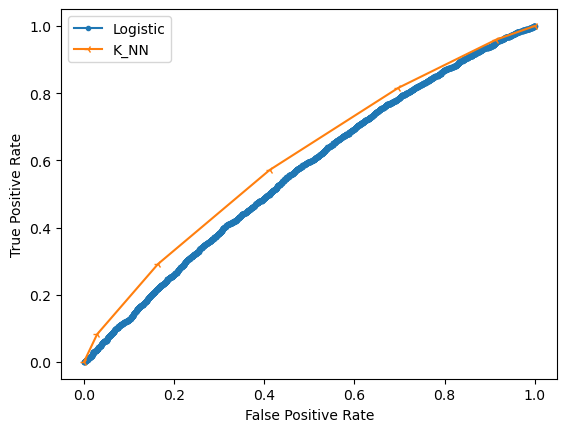

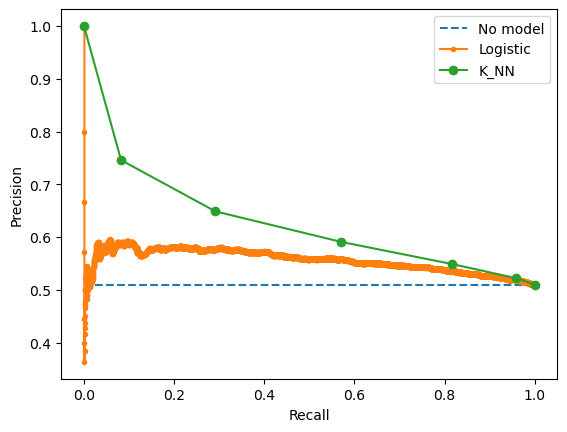

[[1872 1793]
 [1321 2494]]
sử dụng mô hình confunction matrix độ đo presion 0.5862824929533355
sử dụng mô hình confunction matrix độ đo recall 0.5107776261937245
sử dụng mô hình confunction matrix độ đo f1 0.5459317585301838


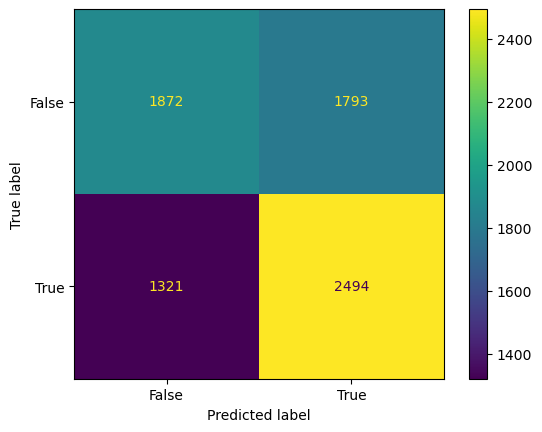

sử dụng mô hình confunction matrix độ đo presion KNN  0.5685654008438819
sử dụng mô hình confunction matrix độ đo recall KNN 0.5882673942701228
sử dụng mô hình confunction matrix độ đo f1 KNN 0.5782486254525949


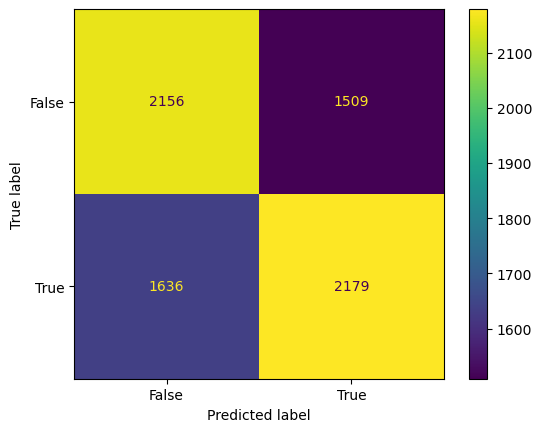

In [11]:
def main():
    X_train, X_test, y_train, y_test=read_data(link = ['C:/Users/ADMIN/Downloads/kagglecatsanddogs_5340/PetImages/Cat',
                          "C:/Users/ADMIN/Downloads/kagglecatsanddogs_5340/PetImages/Dog"])
    y_hat_KNN=Y_du_doan_KNN(X_train, y_train,X_test)
    scores_KNN(y_test,y_hat_KNN)
    y_hat= y_du_doan_logistic(X_test,y_test)
    print("\n")
    scores(y_test,y_hat)
    roc(X_train, y_train,X_test,y_test)
    ps_and_rs(X_train, y_train,X_test,y_test)
    confunction_matrix_logistics(y_test,y_hat)
    confunction_matrix_KNN(y_test,y_hat_KNN)
if __name__=="__main__":
    main()